<a href="https://colab.research.google.com/github/Matte0o0/boh/blob/main/Corso_uni_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt



In [23]:
inflation_data = pd.read_csv("/content/WLD_RTFP_country_2023-08-29.csv")


In [24]:
inflation_data
list_of_countries = inflation_data["country"].unique()
list_of_countries = list_of_countries.tolist()
print(type(list_of_countries))
print(list_of_countries)

<class 'list'>
['Afghanistan', 'Burundi', 'Burkina Faso', 'Central African Republic', 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Gambia, The', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Lao PDR', 'Lebanon', 'Liberia', 'Mali', 'Myanmar', 'Mozambique', 'Niger', 'Nigeria', 'Sudan', 'Somalia', 'South Sudan', 'Syrian Arab Republic', 'Chad', 'Yemen, Rep.']


In [25]:
inflation_data.dtypes
print("Countries to choose from:\n")
print(list_of_countries, "\n")
country_name = input("Country you choose: ").title()

Countries to choose from:

['Afghanistan', 'Burundi', 'Burkina Faso', 'Central African Republic', 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Gambia, The', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Lao PDR', 'Lebanon', 'Liberia', 'Mali', 'Myanmar', 'Mozambique', 'Niger', 'Nigeria', 'Sudan', 'Somalia', 'South Sudan', 'Syrian Arab Republic', 'Chad', 'Yemen, Rep.'] 

Country you choose: Afghanistan


In [26]:
chosen_country = inflation_data[inflation_data["country"] == country_name]

In [27]:
chosen_country

,Open,High,Low,Close,Inflation,country,ISO3,date
0,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-01-01
1,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-02-01
2,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-03-01
3,0.53,0.55,0.53,0.55,NaN,Afghanistan,AFG,2007-04-01
4,0.56,0.57,0.56,0.57,NaN,Afghanistan,AFG,2007-05-01
...,...,...,...,...,...,...,...,...
195,1.50,1.52,1.48,1.50,8.03,Afghanistan,AFG,2023-04-01
196,1.48,1.50,1.46,1.47,3.92,Afghanistan,AFG,2023-05-01
197,1.46,1.48,1.44,1.45,-2.00,Afghanistan,AFG,2023-06-01
198,1.42,1.44,1.41,1.43,-4.10,Afghanistan,AFG,2023-07-01


In [28]:
daily_price_ng = chosen_country[["Open", "Close"]]
dates = chosen_country['date']
dates_converted = pd.to_datetime(dates)

In [29]:
daily_price_ng

,Open,Close
0,0.53,0.53
1,0.53,0.53
2,0.53,0.53
3,0.53,0.55
4,0.56,0.57
...,...,...
195,1.50,1.50
196,1.48,1.47
197,1.46,1.45
198,1.42,1.43


In [30]:
daily_price_ng = daily_price_ng.set_index(dates_converted)
daily_price_ng


,Open,Close
date,,
2007-01-01,0.53,0.53
2007-02-01,0.53,0.53
2007-03-01,0.53,0.53
2007-04-01,0.53,0.55
2007-05-01,0.56,0.57
...,...,...
2023-04-01,1.50,1.50
2023-05-01,1.48,1.47
2023-06-01,1.46,1.45


In [31]:
#plt.plot(daily_price_ng)

In [32]:
inflation_column = chosen_country["Inflation"]
inflation_column = inflation_column.to_frame()
inflation_column = inflation_column.set_index(dates_converted)


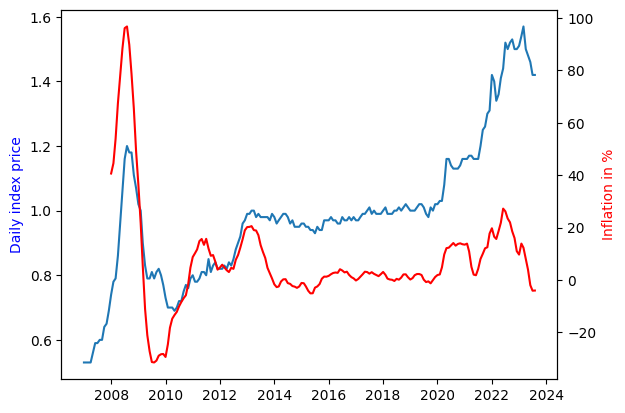

In [33]:
fig, ax = plt.subplots()
ax.plot(daily_price_ng.Open)
ax2= ax.twinx()
ax2.plot(inflation_column, color="red")

ax.set_ylabel("Daily index price", color="blue")
ax2.set_ylabel("Inflation in %", color="red")
plt.show()

In [34]:
print("Countries to choose from:\n")
#print(type(list_of_countries))
#print(country_name)
#print(type(country_name))

list_of_countries.remove(country_name)
print(list_of_countries)
second_country_name = country_name

while second_country_name == country_name:
  second_country_name = input("\nSecond country you choose: ").title()
  if second_country_name == country_name:
    print("You have already selected this country\n")





Countries to choose from:

['Burundi', 'Burkina Faso', 'Central African Republic', 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Gambia, The', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Lao PDR', 'Lebanon', 'Liberia', 'Mali', 'Myanmar', 'Mozambique', 'Niger', 'Nigeria', 'Sudan', 'Somalia', 'South Sudan', 'Syrian Arab Republic', 'Chad', 'Yemen, Rep.']

Second country you choose: Afghanistan
You have already selected this country


Second country you choose: Cameroon


In [35]:
second_chosen_country = inflation_data[inflation_data["country"] == second_country_name]

In [36]:
second_inflation_column = second_chosen_country["Inflation"]
second_inflation_column = second_inflation_column.to_frame()
second_inflation_column = second_inflation_column.set_index(dates_converted)


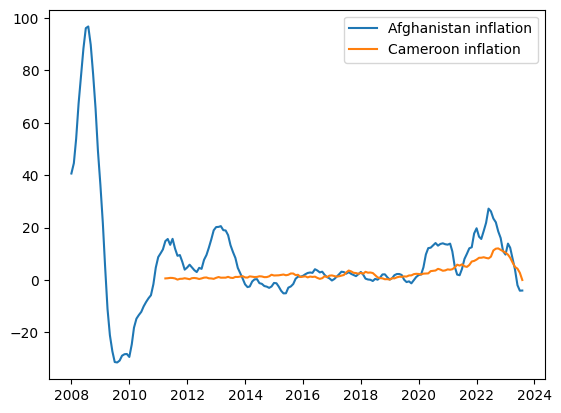

In [37]:
plt.plot(inflation_column, label=country_name + " inflation")
plt.plot(second_inflation_column.Inflation, label=second_country_name + " inflation")

plt.legend()
plt.show()